# Homework

Fill your code where `# TODO` is placed.


In [1]:
import pickle

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

from itertools import product

%matplotlib inline

## Read Dataset

- Data Description
  - trainset = (X_train, y_train)
    - X_train.shape = (2500, 2)
    - y_train.shape = (2500, 1)
  - testset = (X_test, y_test)
    - X_test.shape = (500, 2)
    - y_test.shape = (500, 1)
    
- What to do?
  - train a neural network which classify two class.
  
  
- **HINT** : These functions might help you. (Although it's your job to find out how to properly use these!)
  - ```torch.softmax```
  - ```X.unsqueeze(0)```
  - ```X.item()```

In [2]:
with open('train.pkl', 'rb') as f:
    trainset = pickle.load(f)
    
with open('test.pkl', 'rb') as f:
    testset = pickle.load(f)
    
trainset = list(zip(trainset[0], trainset[1]))
testset = list(zip(testset[0], testset[1]))

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # two input fields, one output field and two layers in between
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 2)

        
    def forward(self, x):
        x = torch.tensor(x)
        #x = torch.softmax(self.fc1(x), dim=0) # thats how it works with softmax (you recommended them above but relu works better here in my tests
        #x = torch.softmax(self.fc2(x), dim=0)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))

        x = self.fc3(x)
        sigm = nn.Sigmoid()
        x = sigm(x)
        return x

## Train

In [4]:
model = Net()
model = model.double()
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss()  ## Be careful! This function takes very specific forms of inputs.

In [5]:
def train(model, trainset, optimizer, criterion):
    train_loss = []
    for x, y in trainset:
        pred_y = model(x)

        loss = criterion(pred_y.unsqueeze(0).float(), torch.tensor([y]))
        model.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss.append(loss.item())

    return train_loss

In [6]:
losses = []
for i in range(3):
    loss = train(model, trainset, optimizer, criterion)
    print(f'Training run {i+1}, loss = {np.average(loss)}')
    losses.append(np.average(loss))

Training run 1, loss = 0.3988715882062912
Training run 2, loss = 0.31803152097463605
Training run 3, loss = 0.31457123950719834


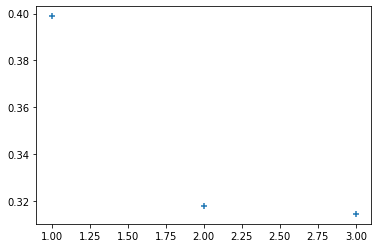

In [7]:
steps = np.arange(1,len(losses)+1)
losses = np.array(losses)
plt.scatter(steps, losses, marker='+')

## Test

In [8]:
def test(model, testset, criterion):  # we don't need optimizer here!
    test_loss = 0.
    losses = []
    for x, y in testset:
        pred_y = model(x)

        loss = criterion(pred_y.unsqueeze(0).float(), torch.tensor([y]))

        losses.append(loss.item())
    test_loss = np.average(losses)
    return test_loss

In [9]:
test(model, testset, criterion)

0.3142708460688591

## Full pipeline
- Stop the iteration when the test loss reaches below ```0.32```.

In [10]:
model = Net()
model = model.double()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 200
losses = []
for epoch in range(epochs):
    loss = train(model, trainset, optimizer, criterion)
    print(f'Training run {epoch}, loss = {np.average(loss)}')
    losses.append(np.average(loss))
    if losses[-1] < .32:
        break

Training run 0, loss = 0.5968748255372047
Training run 1, loss = 0.4421682837367058
Training run 2, loss = 0.41694290385246274
Training run 3, loss = 0.40588661487102506
Training run 4, loss = 0.39607673197984694
Training run 5, loss = 0.38593825711011887
Training run 6, loss = 0.3742144325017929
Training run 7, loss = 0.35991466031074526
Training run 8, loss = 0.34397634690999984
Training run 9, loss = 0.3322398793935776
Training run 10, loss = 0.32578694595098495
Training run 11, loss = 0.32219157291650774
Training run 12, loss = 0.32002411373853684
Training run 13, loss = 0.31860528671741484


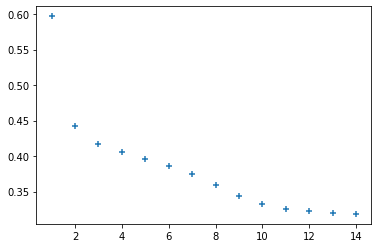

In [11]:
steps = np.arange(1,len(losses)+1)
losses = np.array(losses)
plt.scatter(steps, losses, marker='+')

## Visualize your neural network outputs

- Pass the `viz_X` tensor to the networks and visualize the outputs with matplotlib

In [12]:
viz_X = np.array(list(product(np.linspace(-1.3, 2.3, 50, dtype=np.float32), 
                              np.linspace(-0.8, 1.3, 50, dtype=np.float32))))

/tmp/ipykernel_25935/2703386524.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


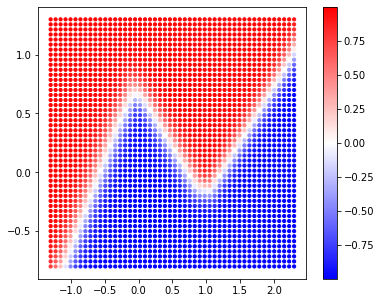

In [13]:
# get result, make it a vector (it was hot vector encoded) and make it a numpy array
y = model(torch.tensor(viz_X).double())
y = y[:,0] - y[:,1]
y = y.detach().numpy()

plt.figure(figsize=(6, 5))
plt.scatter(viz_X[:,0], viz_X[:, 1], c=y, s=10, cmap='bwr')
plt.colorbar()

## Save Model

In [14]:
torch.save(model.state_dict(), 'model.pth')

## Load Model

In [15]:
state_dict = torch.load('model.pth')
model.load_state_dict(state_dict)

<All keys matched successfully>

In [16]:
state_dict

OrderedDict([('fc1.weight',
              tensor([[-0.1215, -0.6223],
                      [-0.8291,  0.5460],
                      [-0.3997,  0.1678],
                      [ 0.4511,  0.7038],
                      [ 2.0929,  0.6278],
                      [ 0.7773,  0.0324],
                      [ 0.0712,  0.3832],
                      [ 0.2862,  0.1998],
                      [ 0.4389, -0.2277],
                      [-1.3490, -0.0594],
                      [ 1.1447,  0.4081],
                      [-0.6045, -0.3520],
                      [ 1.1197, -0.5037],
                      [ 0.0925, -0.7752],
                      [ 0.9155, -0.9219],
                      [-0.2702,  0.8506],
                      [ 1.3489,  0.3790],
                      [-0.4097,  0.5686],
                      [ 0.0216, -0.2602],
                      [-0.8816,  0.0505]], dtype=torch.float64)),
             ('fc1.bias',
              tensor([ 0.7778, -0.2091,  0.7681, -0.1272, -0.2337,  0.8831,  0.345